In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Sardegna'


link = 'https://rally-base.com/2023/rally-italia-sardegna-2023/?ssId='
startat, no_ss=7596, int(19) # starting number of url, count of Special Stages

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,4,Lappi Esa,RC1,00:02:24.9,79.50 0.00,00:00:00.0 00:00:00.0,1,Sardegna,1
2,2,8,Tänak Ott,RC1,00:02:25.1,79.39 0.06,00:00:00.2 00:00:00.2,1,Sardegna,2
3,3,11,Neuville,RC1,00:02:25.4,79.23 0.16,00:00:00.5 00:00:00.3,1,Sardegna,3
4,4,18,Katsuta T,RC1,00:02:25.8,79.01 0.28,00:00:00.9 00:00:00.4,1,Sardegna,4
5,5,69,Rovanperä,RC1,00:02:26.1,78.85 0.37,00:00:01.2 00:00:00.3,1,Sardegna,5
...,...,...,...,...,...,...,...,...,...,...
55,16,82,Biancu Da,RC4,00:06:57.2,67.21 7.99,00:01:02.2 00:00:00.0,19,Sardegna,55
56,16,84,Liceri Mi,RC4,00:06:57.2,67.21 7.99,00:01:02.2 00:00:00.0,19,Sardegna,56
57,16,85,Schirru F,RC4,00:06:57.2,67.21 7.99,00:01:02.2 00:00:00.0,19,Sardegna,57
58,16,86,Mara Gian,RC4,00:06:57.2,67.21 7.99,00:01:02.2 00:00:00.0,19,Sardegna,58


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                             Pos.                                          \
ss                              1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                    
4   Lappi  Esa RC1   Sardegna    1   2   5   3   1   2   2   4   2   3   5   
6   Sordo  Dan RC1   Sardegna    7   7   2  23   8   7   5   8   6   2   4   
7   Loubet  P. RC1   Sardegna    9   3   4   4   2   6  38   -   -   -   -   
8   Tänak  Ott RC1   Sardegna    2   8   6   7   6   4   7   6  11  56  55   
11  Neuville   RC1   Sardegna    3   5   3   5   3   1   3   1   1   5   1   
...                            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
84  Liceri  Mi RC4   Sardegna   64  65  60  56  10  12  59  60  60  55  50   
85  Schirru  F RC4   Sardegna   64  64  59  61  10  12  55  63  63  61  64   
86  Mara  Gian RC4   Sardegna   64  66  61  62  58  65  65  64  62  61  64   
87  Šekuljica  RC5   Sardegna   64  67  63  69  10  12  63  67  64  64  52   
88  Dessi  Mar RC5   Sardegna   64  68  65  67  10  12  70  65  67  65  53   

0                                                              
ss                             12  13  14  15  16  17  18  19  
No. Crew       Group Race                                      
4   Lappi  Esa RC1   Sardegna   1   3   3   4   5   6   2   6  
6   Sordo  Dan RC1   Sardegna   6   5   1   2  14  32   -   -  
7   Loubet  P. RC1   Sardegna   -   -   -   -   -   -   -   -  
8   Tänak  Ott RC1   Sardegna  52  48  44  44   1   1   9   2  
11  Neuville   RC1   Sardegna   2   1   2   1   2   4   3   7  
...                            ..  ..  ..  ..  ..  ..  ..  ..  
84  Liceri  Mi RC4   Sardegna  49  50  43  41  56  57  57  16  
85  Schirru  F RC4   Sardegna  62  62  60  63  58  58  56  16  
86  Mara  Gian RC4   Sardegna  62  62  60  63  60  60  58  16  
87  Šekuljica  RC5   Sardegna  50  55  63  41  61  61   -   -  
88  Dessi  Mar RC5   Sardegna  51  65  65  41  63  62  60  16  

[70 rows x 19 columns]

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3660 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,4,Lappi Esa,RC1,1,Sardegna,1,144.9
2,8,Tänak Ott,RC1,1,Sardegna,2,145.1
3,11,Neuville,RC1,1,Sardegna,3,145.4
4,18,Katsuta T,RC1,1,Sardegna,4,145.8
5,69,Rovanperä,RC1,1,Sardegna,5,146.1
...,...,...,...,...,...,...,...
55,82,Biancu Da,RC4,19,Sardegna,55,417.2
56,84,Liceri Mi,RC4,19,Sardegna,56,417.2
57,85,Schirru F,RC4,19,Sardegna,57,417.2
58,86,Mara Gian,RC4,19,Sardegna,58,417.2


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Sardegna 1      144.9
         2      439.2
         3      331.6
         4     1893.9
         5      428.9
         6      329.1
         7     1915.4
         8      601.6
         9      765.0
         10    1125.7
         11     413.2
         12     592.3
         13     773.8
         14    1171.6
         15     443.1
         16     517.7
         17     337.1
         18     511.7
         19     355.0

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,4,Lappi Esa,RC1,1,Sardegna,1,144.9,144.9
1,8,Tänak Ott,RC1,1,Sardegna,2,145.1,144.9
2,11,Neuville,RC1,1,Sardegna,3,145.4,144.9
3,18,Katsuta T,RC1,1,Sardegna,4,145.8,144.9
4,69,Rovanperä,RC1,1,Sardegna,5,146.1,144.9
...,...,...,...,...,...,...,...,...
1256,82,Biancu Da,RC4,19,Sardegna,55,417.2,355.0
1257,84,Liceri Mi,RC4,19,Sardegna,56,417.2,355.0
1258,85,Schirru F,RC4,19,Sardegna,57,417.2,355.0
1259,86,Mara Gian,RC4,19,Sardegna,58,417.2,355.0


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,4,Lappi Esa,RC1,1,Sardegna,1,144.9,144.9,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Sardegna,2,145.1,144.9,0.2,0.138026,01
2,11,Neuville,RC1,1,Sardegna,3,145.4,144.9,0.5,0.345066,01
3,18,Katsuta T,RC1,1,Sardegna,4,145.8,144.9,0.9,0.621118,01
4,69,Rovanperä,RC1,1,Sardegna,5,146.1,144.9,1.2,0.828157,01
...,...,...,...,...,...,...,...,...,...,...,...
1256,82,Biancu Da,RC4,19,Sardegna,55,417.2,355.0,62.2,17.521127,19
1257,84,Liceri Mi,RC4,19,Sardegna,56,417.2,355.0,62.2,17.521127,19
1258,85,Schirru F,RC4,19,Sardegna,57,417.2,355.0,62.2,17.521127,19
1259,86,Mara Gian,RC4,19,Sardegna,58,417.2,355.0,62.2,17.521127,19


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,4,Lappi Esa,RC1,1,Sardegna,1,144.9,144.9,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Sardegna,2,145.1,144.9,0.2,0.138026,01
2,11,Neuville,RC1,1,Sardegna,3,145.4,144.9,0.5,0.345066,01
3,18,Katsuta T,RC1,1,Sardegna,4,145.8,144.9,0.9,0.621118,01
4,69,Rovanperä,RC1,1,Sardegna,5,146.1,144.9,1.2,0.828157,01
...,...,...,...,...,...,...,...,...,...,...,...
1204,18,Katsuta T,RC1,19,Sardegna,3,359.8,355.0,4.8,1.352113,19
1205,33,Evans Elf,RC1,19,Sardegna,4,361.8,355.0,6.8,1.915493,19
1206,17,Ogier S.,RC1,19,Sardegna,5,361.8,355.0,6.8,1.915493,19
1207,4,Lappi Esa,RC1,19,Sardegna,6,370.9,355.0,15.9,4.478873,19


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,4,Lappi Esa,RC1,1,Sardegna,1,144.9,144.9,0.0,0.000000,01
1,8,Tänak Ott,RC1,1,Sardegna,2,145.1,144.9,0.2,0.138026,01
2,11,Neuville,RC1,1,Sardegna,3,145.4,144.9,0.5,0.345066,01
3,18,Katsuta T,RC1,1,Sardegna,4,145.8,144.9,0.9,0.621118,01
4,69,Rovanperä,RC1,1,Sardegna,5,146.1,144.9,1.2,0.828157,01
...,...,...,...,...,...,...,...,...,...,...,...
1204,18,Katsuta T,RC1,19,Sardegna,3,359.8,355.0,4.8,1.352113,19
1205,33,Evans Elf,RC1,19,Sardegna,4,361.8,355.0,6.8,1.915493,19
1206,17,Ogier S.,RC1,19,Sardegna,5,361.8,355.0,6.8,1.915493,19
1207,4,Lappi Esa,RC1,19,Sardegna,6,370.9,355.0,15.9,4.478873,19


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Sardegna                                                          \
SS.              01    02   03     04    05   06     07    08     09     10   
Crew                                                                          
Evans  Elf      2.0  10.8  5.2   12.7   8.9  9.1   42.7   9.5   14.0  113.1   
Katsuta  T      0.9   6.3  0.0   27.7  12.1  3.5   22.7  30.5  600.0  600.0   
Lappi  Esa      0.0   1.7  2.7   16.7   0.0  2.6    2.1   2.9    2.2   13.0   
Loubet  P.      2.1   4.7  2.5   17.5   6.4  4.8  600.0   NaN    NaN    NaN   
Neuville        0.5   7.2  1.4   25.9   6.7  0.0    2.7   0.0    0.0   14.5   
Ogier  S.       1.3   0.0  3.5    0.0   7.6  4.6    8.9   1.1    4.2    0.0   
Rovanperä       1.2   7.8  5.1   40.2  10.3  7.3    0.0   1.3    6.5   14.3   
Sordo  Dan      1.8   9.0  1.1  189.1  10.7  4.9   22.4  24.0   30.7    4.9   
Tänak  Ott      0.2   9.9  3.1   34.9  10.2  4.4   32.9  10.2   44.2  600.0   

Race                                                                   
SS.            11     12     13     14     15    16    17    18    19  
Crew                                                                   
Evans  Elf   43.4   15.7   42.9   61.8   12.3   4.3   8.7   7.2   6.8  
Katsuta  T  600.0  600.0  600.0  600.0  600.0  10.8   2.3   0.0   4.8  
Lappi  Esa    8.5    0.0    6.4   32.6   12.6   9.3  10.0   4.4  15.9  
Loubet  P.    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN  
Neuville      0.0    3.0    0.0    5.7    0.0   4.3   8.4   4.9  25.4  
Ogier  S.     3.0    7.7   12.6  600.0  600.0  12.4   5.4  21.9   6.8  
Rovanperä     3.7    9.7    3.7   52.2   15.0  21.8  11.4  14.4   0.0  
Sordo  Dan    5.0   23.2   37.9    0.0   10.8  23.3  43.9   NaN   NaN  
Tänak  Ott  600.0  600.0  600.0  600.0  600.0   0.0   0.0  15.3   4.7

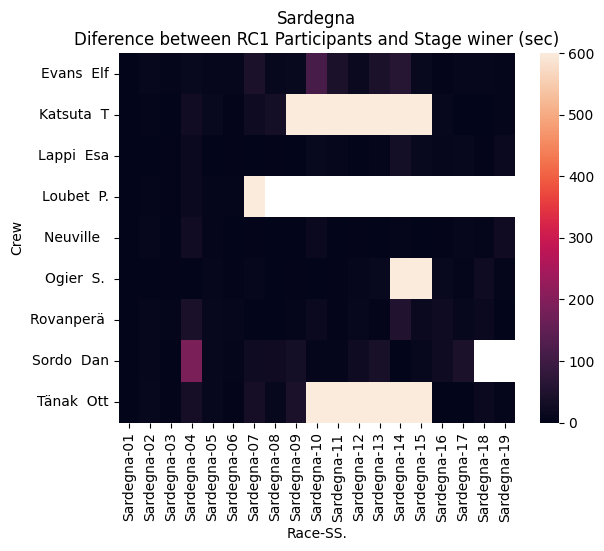

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

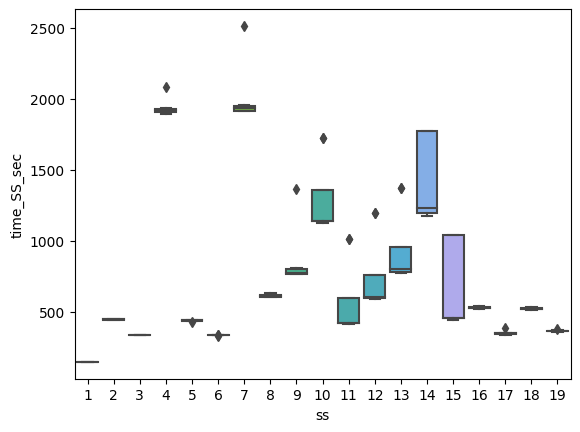

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

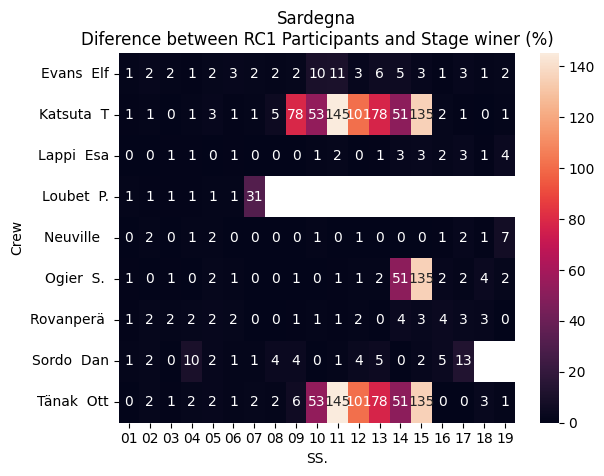

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")